Nulls before cleaning:
 OrderDate            1
OrderNumber          1
ProductKey           1
SalespersonKey       1
Salesperson          1
Supervisor           1
Manager              1
Channel              1
Quantity             1
UnitPrice            1
Total             3015
Month                1
Year                 1
dtype: int64
Total rows before cleaning: 41587

Nulls after cleaning:
 OrderDate         0
OrderNumber       0
ProductKey        0
SalespersonKey    0
Salesperson       0
Supervisor        0
Manager           0
Channel           0
Quantity          0
UnitPrice         0
Total             0
Month             0
Year              0
dtype: int64
Total rows after cleaning: 38572

Cleaned data saved to 'Cleaned_Ecommerce_Data.csv'.


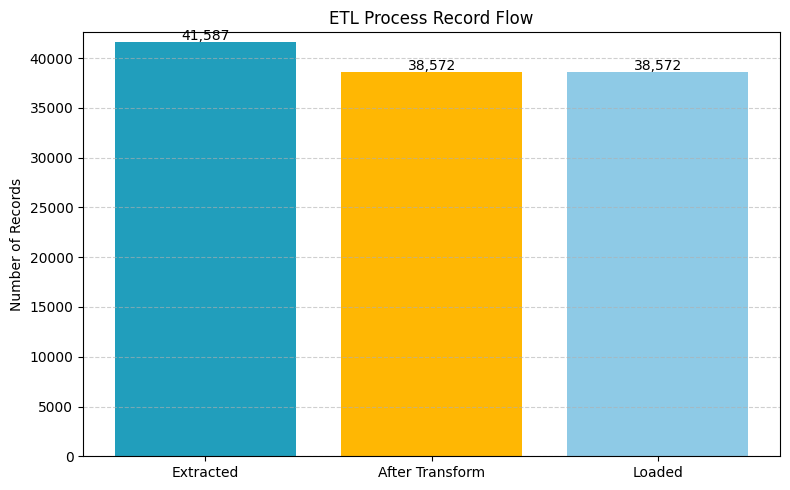

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "Ecommerce+Sales+Data.xlsx"  # Ensure this file exists in the same folder as your script
excel_file = pd.ExcelFile(file_path)

# Parse the first sheet
sheet_name = excel_file.sheet_names[0]
df = excel_file.parse(sheet_name)

# Convert 'OrderDate' column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Check missing values and record the initial number of rows
nulls_before = df.isnull().sum()
rows_before = len(df)
print("Nulls before cleaning:\n", nulls_before)
print(f"Total rows before cleaning: {rows_before}")

# Drop rows with any null values
df_cleaned = df.dropna()

# Check nulls and row count after cleaning
nulls_after = df_cleaned.isnull().sum()
rows_after = len(df_cleaned)
print("\nNulls after cleaning:\n", nulls_after)
print(f"Total rows after cleaning: {rows_after}")

# Save the cleaned data to a CSV file
df_cleaned.to_csv("Cleaned_Ecommerce_Data.csv", index=False)
print("\nCleaned data saved to 'Cleaned_Ecommerce_Data.csv'.")

# Prepare data for ETL visualization
stages = ['Extracted', 'After Transform', 'Loaded']
record_counts = [rows_before, rows_after, rows_after]
colors = ['#219ebc', '#ffb703', '#8ecae6']

# Plot the ETL process record flow
plt.figure(figsize=(8, 5))
plt.bar(stages, record_counts, color=colors)
plt.title('ETL Process Record Flow')
plt.ylabel('Number of Records')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, rows_before + 1000)

# Annotate bar values
for i, count in enumerate(record_counts):
    plt.text(i, count + 200, f"{count:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
